In [1]:
import os
import torch
import pickle
from torch.utils import data
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

import sys 
sys.path.append('..')
from dataset import NyuV2
import transforms_nyu

%matplotlib inline

In [14]:
data_path = '../data/nyu_v2/'
batch_size = 4

seed = 2
torch.manual_seed(seed)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [38]:
depth_size = (25, 32)
model_input = 224
transformers = {
    'train': transforms.Compose([transforms_nyu.Scale(),
                               transforms_nyu.RandomRescale(480),
                               transforms_nyu.RandomCrop(model_input),
                               transforms_nyu.RandomHorizontalFlip(0.5),
                               transforms_nyu.ToTensor()]),

    'val': transforms.Compose([transforms_nyu.Scale(),
                               transforms_nyu.RandomCrop(model_input),
                               transforms_nyu.ToTensor()])
}

nyu = {
    'train': NyuV2(os.path.join(data_path, 'train'), transform=transformers['train']),

    'val': NyuV2(os.path.join(data_path, 'val'), transform=transformers['val'])
}

dataloaders = {
    'train': data.DataLoader(nyu['train'],
                             batch_size=batch_size, shuffle=True),
    'val': data.DataLoader(nyu['val'],
                           batch_size=batch_size, shuffle=True)
}

In [39]:
nyu = NyuV2(os.path.join(data_path, 'val'), transform=transformers['train'])
test_loader = data.DataLoader(nyu, batch_size=batch_size, shuffle=False)

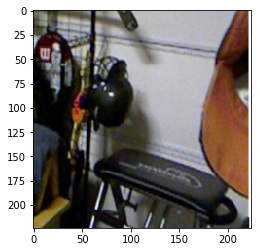

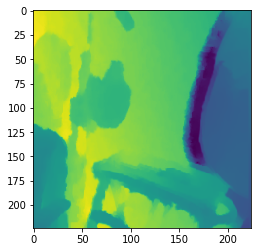

In [35]:
sample = next(iter(test_loader))
plt.imshow(sample['image'][0])
plt.figure()
plt.imshow(sample['depth'][0])

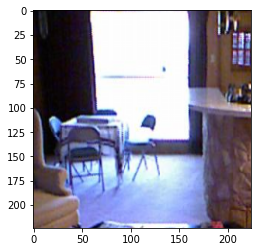

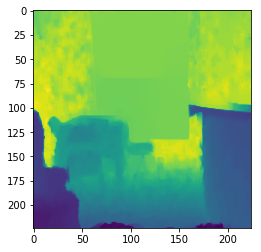

In [12]:
plt.imshow(sample['image'][3])
plt.figure()
plt.imshow(sample['depth'][3])

In [36]:
transform = transforms.Compose([transforms_nyu.Scale(),
                               transforms_nyu.RandomRescale(380),
                               transforms_nyu.RandomCrop(224),
                               transforms_nyu.RandomHorizontalFlip(0.5),
                               transforms_nyu.ToTensor()])
nyu = NyuV2(os.path.join(data_path, 'val'), transform=transform)
test_loader = data.DataLoader(nyu, batch_size=batch_size, shuffle=False)

In [37]:
sample = next(iter(test_loader))
print(sample['image'].shape)
print(sample['depth'].shape)

torch.Size([4, 3, 224, 224])
torch.Size([4, 800])


Original images

In [2]:
img_file = '../data/nyu_v2/train/images/00000.p'
depth_file = '../data/nyu_v2/train/depths/00000.p'
img = pickle.load(open(img_file, 'rb'))
dpt = pickle.load(open(depth_file, 'rb'))

In [3]:
img.shape

(480, 640, 3)

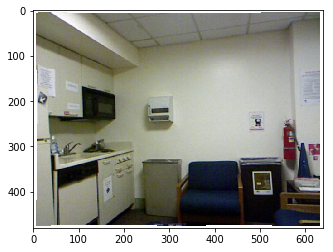

In [4]:
plt.imshow(np.fliplr(img/255))

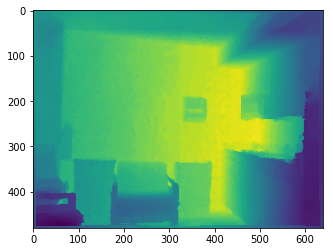

In [5]:
plt.imshow(dpt/10)

In [12]:
x = torch.from_numpy(img)
x = x.type(torch.DoubleTensor)
x

tensor([[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       